In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#loading dataset
df = pd.read_csv("C:\\Users\\devar\\OneDrive\\Desktop\\ScreenSense-kid's screentime visualization\\Indian_Kids_Screen_Time.csv")


In [5]:
# View columns to identify relevant ones
print(df.columns)


Index(['Age', 'Gender', 'Avg_Daily_Screen_Time_hr', 'Primary_Device',
       'Exceeded_Recommended_Limit', 'Educational_to_Recreational_Ratio',
       'Health_Impacts', 'Urban_or_Rural'],
      dtype='object')


In [7]:
# Print all column names to see exact names
print(df.columns.tolist())



['Age', 'Gender', 'Avg_Daily_Screen_Time_hr', 'Primary_Device', 'Exceeded_Recommended_Limit', 'Educational_to_Recreational_Ratio', 'Health_Impacts', 'Urban_or_Rural']


In [8]:
# Preview the data
print("Dataset preview:")
print(df.head())
print("\nColumns available:", df.columns)


Dataset preview:
   Age  Gender  Avg_Daily_Screen_Time_hr Primary_Device  \
0   14    Male                      3.99     Smartphone   
1   11  Female                      4.61         Laptop   
2   18  Female                      3.73             TV   
3   15  Female                      1.21         Laptop   
4   12  Female                      5.89     Smartphone   

   Exceeded_Recommended_Limit  Educational_to_Recreational_Ratio  \
0                        True                               0.42   
1                        True                               0.30   
2                        True                               0.32   
3                       False                               0.39   
4                        True                               0.49   

           Health_Impacts Urban_or_Rural  
0  Poor Sleep, Eye Strain          Urban  
1              Poor Sleep          Urban  
2              Poor Sleep          Urban  
3                     NaN          Urban  
4   

In [12]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9712 entries, 0 to 9711
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                9712 non-null   int64  
 1   Gender                             9712 non-null   object 
 2   Avg_Daily_Screen_Time_hr           9712 non-null   float64
 3   Primary_Device                     9712 non-null   object 
 4   Exceeded_Recommended_Limit         9712 non-null   bool   
 5   Educational_to_Recreational_Ratio  9712 non-null   float64
 6   Health_Impacts                     6494 non-null   object 
 7   Urban_or_Rural                     9712 non-null   object 
dtypes: bool(1), float64(2), int64(1), object(4)
memory usage: 540.7+ KB


In [11]:
df.shape

(9712, 8)

In [13]:
df.describe

<bound method NDFrame.describe of       Age  Gender  Avg_Daily_Screen_Time_hr Primary_Device  \
0      14    Male                      3.99     Smartphone   
1      11  Female                      4.61         Laptop   
2      18  Female                      3.73             TV   
3      15  Female                      1.21         Laptop   
4      12  Female                      5.89     Smartphone   
...   ...     ...                       ...            ...   
9707   17    Male                      3.26     Smartphone   
9708   17  Female                      4.43     Smartphone   
9709   16    Male                      5.62     Smartphone   
9710   17    Male                      5.60             TV   
9711   15  Female                      6.12             TV   

      Exceeded_Recommended_Limit  Educational_to_Recreational_Ratio  \
0                           True                               0.42   
1                           True                               0.30   
2       

In [16]:
print("Missing values in each column:\n", df.isnull().sum())


Missing values in each column:
 Age                                     0
Gender                                  0
Avg_Daily_Screen_Time_hr                0
Primary_Device                          0
Exceeded_Recommended_Limit              0
Educational_to_Recreational_Ratio       0
Health_Impacts                       3218
Urban_or_Rural                          0
dtype: int64


In [17]:
for col in df.select_dtypes(include='object').columns:
    print(f"\nUnique values in '{col}':")
    print(df[col].unique())



Unique values in 'Gender':
['Male' 'Female']

Unique values in 'Primary_Device':
['Smartphone' 'Laptop' 'TV' 'Tablet']

Unique values in 'Health_Impacts':
['Poor Sleep, Eye Strain' 'Poor Sleep' nan 'Poor Sleep, Anxiety'
 'Poor Sleep, Obesity Risk' 'Eye Strain' 'Obesity Risk' 'Anxiety'
 'Poor Sleep, Anxiety, Obesity Risk' 'Eye Strain, Obesity Risk'
 'Eye Strain, Anxiety, Obesity Risk' 'Anxiety, Obesity Risk'
 'Poor Sleep, Eye Strain, Obesity Risk' 'Poor Sleep, Eye Strain, Anxiety'
 'Poor Sleep, Eye Strain, Anxiety, Obesity Risk' 'Eye Strain, Anxiety']

Unique values in 'Urban_or_Rural':
['Urban' 'Rural']


In [18]:
df.duplicated().sum()


np.int64(44)

In [20]:
missing_percent = (df.isnull().sum() / len(df)) * 100
print(missing_percent)


Age                                   0.000000
Gender                                0.000000
Avg_Daily_Screen_Time_hr              0.000000
Primary_Device                        0.000000
Exceeded_Recommended_Limit            0.000000
Educational_to_Recreational_Ratio     0.000000
Health_Impacts                       33.134267
Urban_or_Rural                        0.000000
dtype: float64


In [21]:
df[df.isnull().any(axis=1)]


,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
3,15,Female,1.21,Laptop,False,0.39,NaN,Urban
6,17,Male,2.97,TV,False,0.48,NaN,Rural
7,10,Male,2.74,TV,True,0.54,NaN,Urban
19,9,Female,0.00,TV,False,0.42,NaN,Urban
22,9,Female,1.63,Tablet,False,0.58,NaN,Urban
...,...,...,...,...,...,...,...,...
9695,12,Female,2.69,Smartphone,False,0.48,NaN,Urban
9697,16,Female,4.74,Smartphone,True,0.41,NaN,Rural
9699,10,Female,2.85,TV,True,0.49,NaN,Urban
9701,16,Male,6.08,Smartphone,True,0.38,NaN,Urban


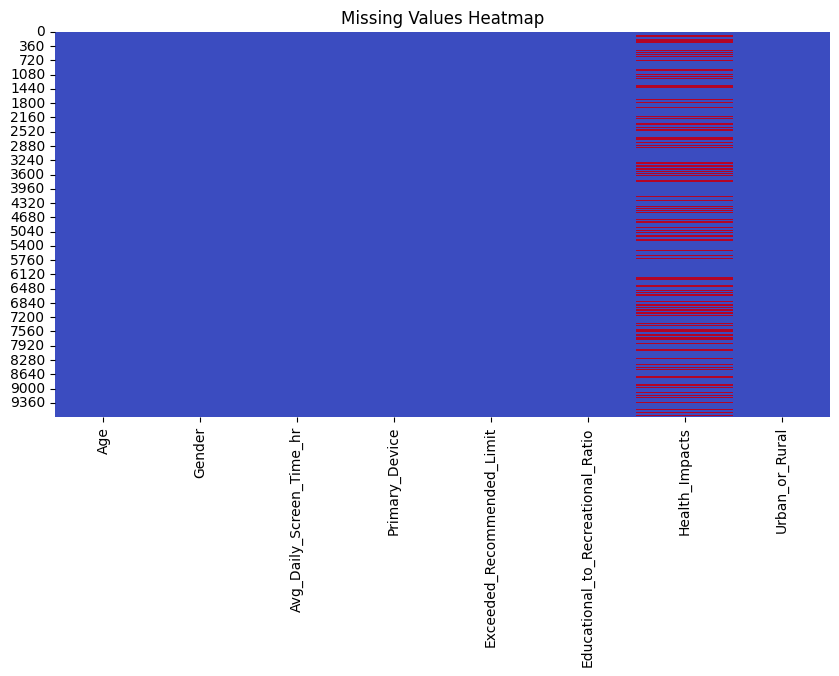

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=False, cmap='coolwarm')
plt.title("Missing Values Heatmap")
plt.show()


In [29]:
# Group by Urban_or_Rural and calculate average daily screen time
avg_screen_time = df.groupby('Urban_or_Rural')['Avg_Daily_Screen_Time_hr'].mean().reset_index()
print(avg_screen_time)

  Urban_or_Rural  Avg_Daily_Screen_Time_hr
0          Rural                  4.373702
1          Urban                  4.344123


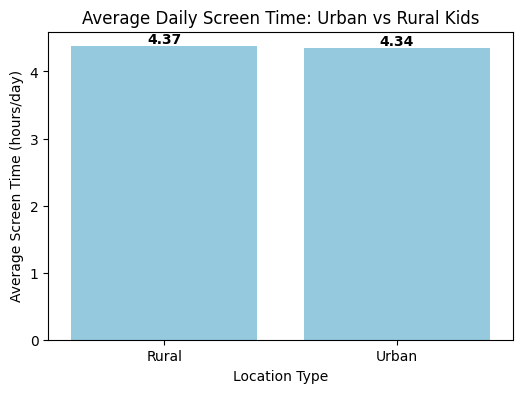

In [32]:

avg_screen_time = df.groupby('Urban_or_Rural')['Avg_Daily_Screen_Time_hr'].mean().reset_index()

# Create the bar plot safely
plt.figure(figsize=(6,4))
barplot = sns.barplot(
    data=avg_screen_time,
    x='Urban_or_Rural',
    y='Avg_Daily_Screen_Time_hr',
    color='skyblue'  # Use 'color' instead of 'palette' to avoid warnings
)

# Add values on top of the bars
for i, v in enumerate(avg_screen_time['Avg_Daily_Screen_Time_hr']):
    plt.text(i, v + 0.05, f"{v:.2f}", ha='center', fontweight='bold')

# Titles and labels
plt.title("Average Daily Screen Time: Urban vs Rural Kids")
plt.xlabel("Location Type")
plt.ylabel("Average Screen Time (hours/day)")

plt.show()

